In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score

from warnings import filterwarnings
filterwarnings(action='ignore')

In [51]:
df = pd.read_csv('creditcard_new.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [52]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

1081


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [53]:
df['Class'].nunique()

2

In [54]:
df.drop_duplicates(inplace = True)

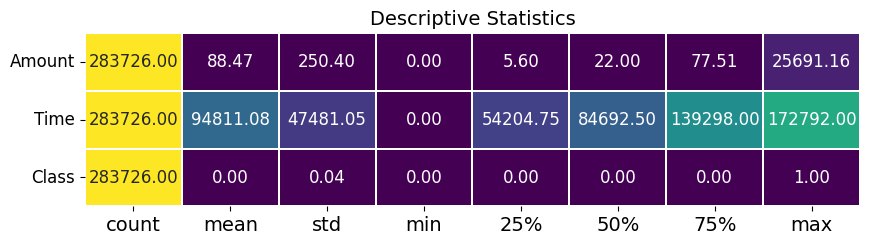

In [55]:
# statistical summary:
cols =df[["Amount","Time","Class"]]
def desc_stats(dataframe, style='viridis'):
    desc = dataframe.describe().T
    f, ax = plt.subplots(figsize=(10, desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot=True,
                cmap=style,  # Change the style here
                fmt='.2f',
                ax=ax,
                linecolor='white',
                linewidths=1.3,
                cbar=False,
                annot_kws={"size": 12}
               )
    plt.xticks(size=14)
    plt.yticks(size=12, rotation=0)
    plt.title("Descriptive Statistics", size=14)
    plt.show()    
desc_stats(cols)

In [56]:
# making Hour feature from Time feature
df["Hour"] = df["Time"].apply(lambda x: np.ceil(float(x)/3600) % 24)
df["Hour"] = df["Hour"].astype("int")
df1 = df[['Hour', 'Amount', 'Class']]
sum_val = df1.groupby('Class')[['Hour', 'Amount']].sum().reset_index()

sum_val

,Class,Hour,Amount
0,0,4002026,25043410.29
1,1,5578,58591.39


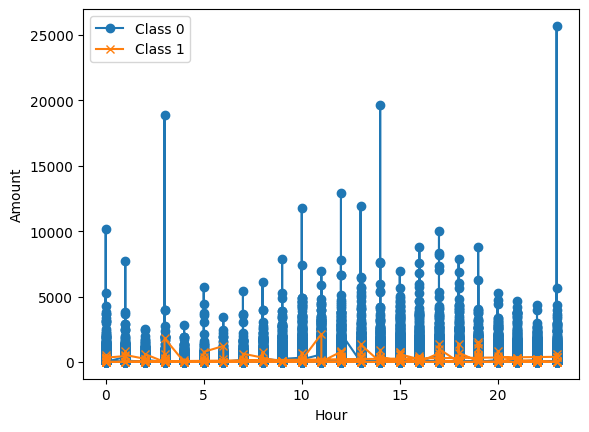

In [57]:
# Split the DataFrame into two based on 'Class' values
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]

# Create a plot with 'Hour' on the x-axis and 'Amount' on the y-axis
plt.plot(class_0['Hour'], class_0['Amount'], label='Class 0', marker='o')
plt.plot(class_1['Hour'], class_1['Amount'], label='Class 1', marker='x')

# Set labels and a legend
plt.xlabel('Hour')
plt.ylabel('Amount')
plt.legend()

# Show the plot
plt.show()

In [58]:
df.drop('Time' , axis = 1 , inplace = True)

In [59]:
df = df[['Hour','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']]
df

,Hour,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,1,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


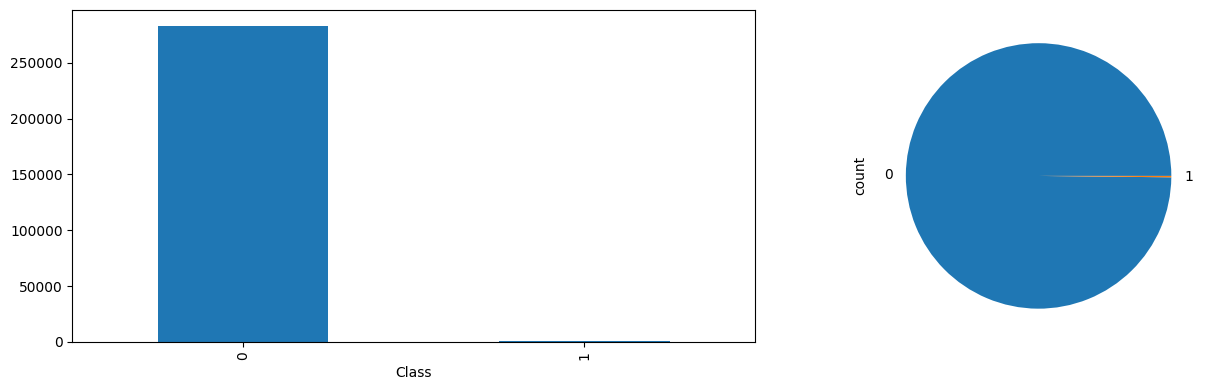

In [60]:
plt.figure(figsize = (14,4))
plt.subplot(121)
df['Class'].value_counts().plot(kind = 'bar')
plt.subplot(122)
df['Class'].value_counts().plot(kind = 'pie')

plt.tight_layout()
plt.show()

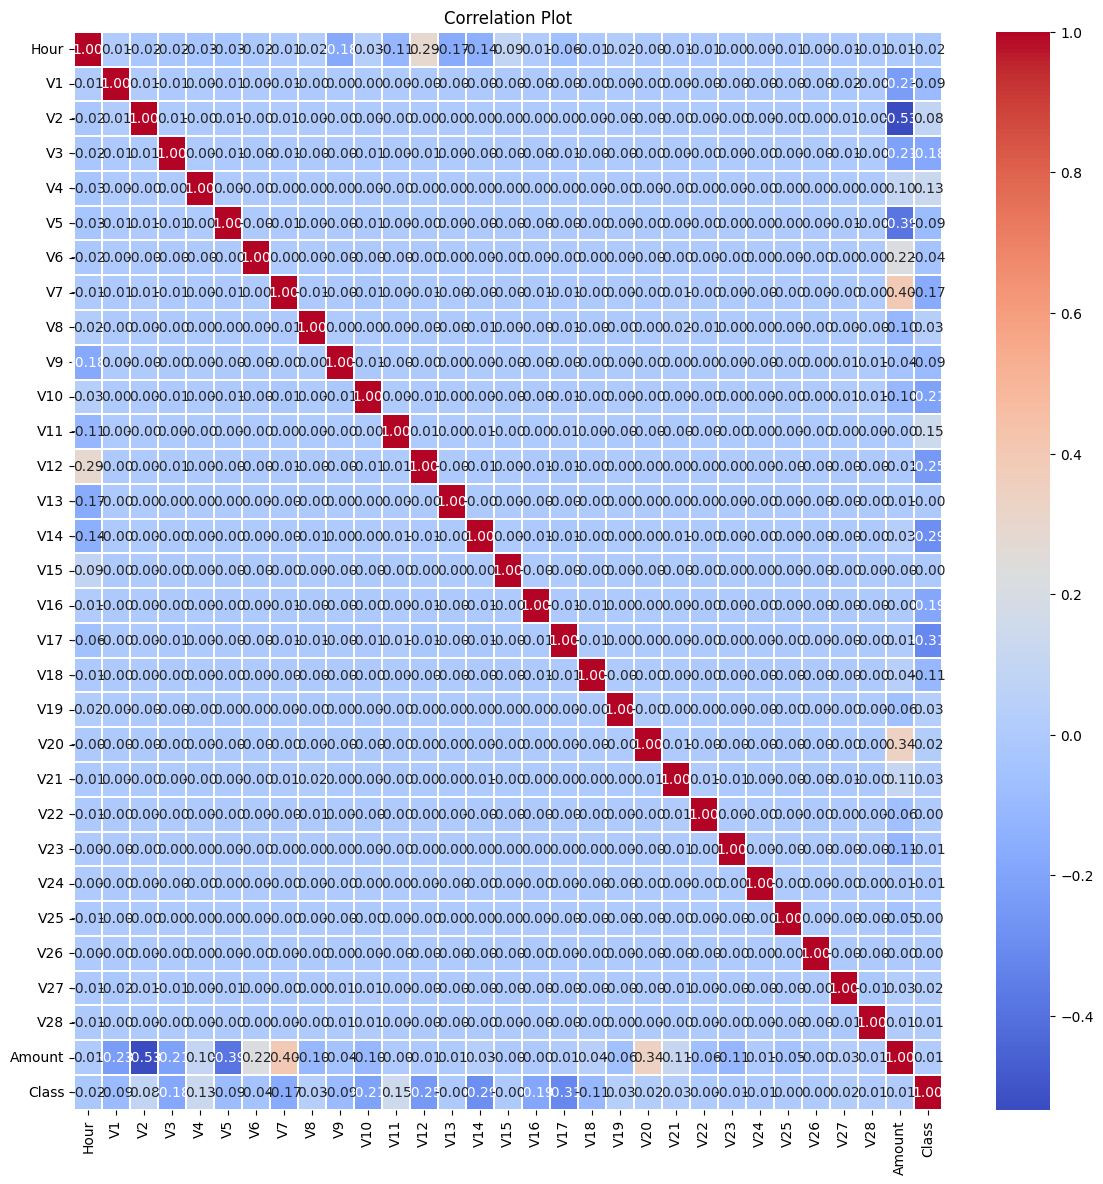

In [61]:
plt.figure(figsize=(14, 14))
plt.title('Correlation Plot')
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()


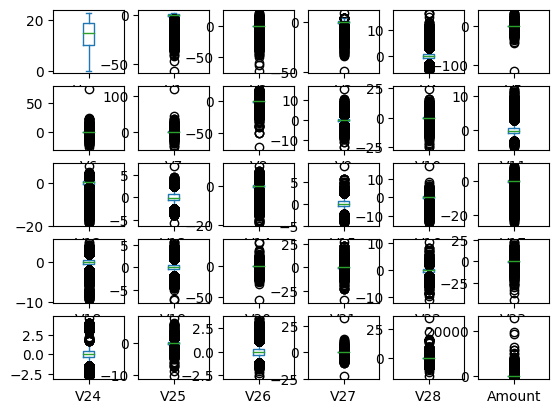

In [62]:
df.drop('Class' , axis = 1).plot(kind = 'box' , subplots = True , layout = (5,6) , sharex = False)
plt.show()

In [63]:
def cap_data(df):
    df_copy = df.copy()  
    for col in df_copy.columns:
        print("capping the", col)
        if df_copy[col].dtype in [float, int]:  # No need for separate checks
            percentiles = df_copy[col].quantile([0.25, 0.75]).values
            df_copy[col][df_copy[col] <= percentiles[0]] = percentiles[0]
            df_copy[col][df_copy[col] >= percentiles[1]] = percentiles[1]
    return df_copy

In [64]:
final_df = cap_data(df.drop('Class' ,axis = 1))
final_df['Class'] = df['Class'].copy()

capping the Hour
capping the V1
capping the V2
capping the V3
capping the V4
capping the V5
capping the V6
capping the V7
capping the V8
capping the V9
capping the V10
capping the V11
capping the V12
capping the V13
capping the V14
capping the V15
capping the V16
capping the V17
capping the V18
capping the V19
capping the V20
capping the V21
capping the V22
capping the V23
capping the V24
capping the V25
capping the V26
capping the V27
capping the V28
capping the Amount


In [65]:
X = final_df.iloc[: , :-1]
y = final_df.iloc[: , -1]

In [66]:
print("Shape of X is ::" , X.shape)
print("Shape of y is ::" , y.shape)

Shape of X is :: (283726, 30)
Shape of y is :: (283726,)


In [67]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res , y_res = nm.fit_resample(X , y)

In [68]:
from collections import Counter
print("Original dataset shape ::",Counter(y))
print("Resampled dataset shape ::",Counter(y_res))

Original dataset shape :: Counter({0: 283253, 1: 473})
Resampled dataset shape :: Counter({0: 473, 1: 473})


In [69]:
X_train , X_test , y_train , y_test = train_test_split(X_res ,
                                                       y_res , random_state=45 ,
                                                       test_size=0.2)

In [70]:
# It will remove the first feature that is correlated with anything other feature

def correlation(dataset , threshold):
    
     # Input validation
    if not isinstance(dataset, pd.DataFrame):
        raise ValueError("Input 'dataset' must be a pandas DataFrame.")
    if not (-1 <= threshold <= 1):
        raise ValueError("Threshold must be between -1 and 1.")
        
    col_corr = set() # set of all the names of correlated column
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i] # Getting the name of the colummn
                col_corr.add(colname)
    return col_corr

In [71]:
corr_features = correlation(X_train , 0.8)
len(set(corr_features))

3

In [72]:
X_train.drop(corr_features , axis = 1 , inplace=True)
X_test.drop(corr_features , axis = 1 , inplace = True)

In [73]:
scaler = MinMaxScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,IsolationForest,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [75]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
ifc = IsolationForest(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
cat = CatBoostClassifier(n_estimators=50,random_state=2)
lgb = LGBMClassifier(n_estimators=50,random_state=2)

In [27]:
classifiers = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'ifc': ifc,
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [76]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') 
    
    return accuracy, precision

In [77]:
accuracy_scores = []
precision_scores = []

for name,clf in classifiers.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train_trf,y_train,X_test_trf,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.5157894736842106
Precision -  0.7540106951871657
For  KN
Accuracy -  0.9368421052631579
Precision -  0.9417366946778712
For  NB
Accuracy -  0.8842105263157894
Precision -  0.8843808890366921
For  DT
Accuracy -  0.9368421052631579
Precision -  0.9376179376179377
For  LR
Accuracy -  0.9
Precision -  0.900044326241135
For  RF
Accuracy -  0.9736842105263158
Precision -  0.9737367021276596
For  ifc
Accuracy -  0.19473684210526315
Precision -  0.14566929133858267
For  AdaBoost
Accuracy -  0.9526315789473684
Precision -  0.9530834072759538
For  BgC
Accuracy -  0.968421052631579
Precision -  0.9686287551269261
For  ETC
Accuracy -  0.9736842105263158
Precision -  0.9737367021276596
For  GBDT
Accuracy -  0.9578947368421052
Precision -  0.9578947368421052
For  xgb
Accuracy -  0.9473684210526315
Precision -  0.9473684210526315
Learning rate set to 0.142596
0:	learn: 0.4871839	total: 9.17ms	remaining: 449ms
1:	learn: 0.3915733	total: 15.2ms	remaining: 365ms
2:	learn: 0.325196

In [78]:
performance_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores , 'Precision':precision_scores})
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.515789,0.754011
1,KN,0.936842,0.941737
2,NB,0.884211,0.884381
3,DT,0.936842,0.937618
4,LR,0.900000,0.900044
5,RF,0.973684,0.973737
6,ifc,0.194737,0.145669
7,AdaBoost,0.952632,0.953083
8,BgC,0.968421,0.968629
9,ETC,0.973684,0.973737


In [79]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.515789
1,KN,Accuracy,0.936842
2,NB,Accuracy,0.884211
3,DT,Accuracy,0.936842
4,LR,Accuracy,0.900000
5,RF,Accuracy,0.973684
6,ifc,Accuracy,0.194737
7,AdaBoost,Accuracy,0.952632
8,BgC,Accuracy,0.968421
9,ETC,Accuracy,0.973684


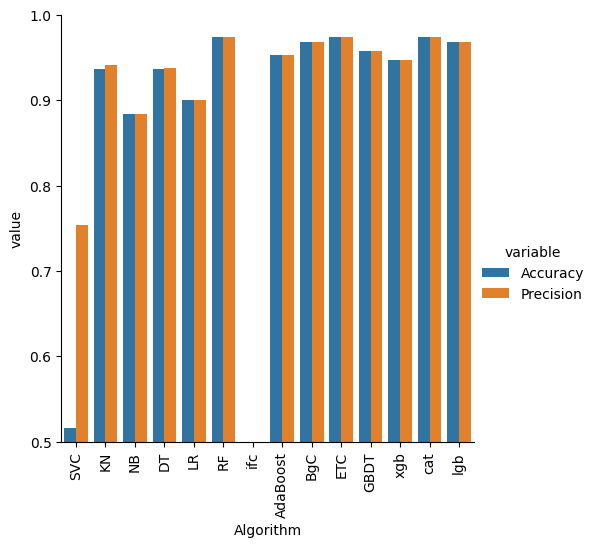

In [80]:
# Categorical Plot
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5) 
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [81]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[
    ('ETC', etc),
    ('cat', xgb),
    ('RF', rfc)
],voting='soft')
voting.fit(X_train_trf , y_train)
y_pred = voting.predict(X_test_trf)
print('Accuracy Score is ::',accuracy_score(y_test , y_pred))

Accuracy Score is :: 0.9736842105263158


RandomForest Model Feature Importance:


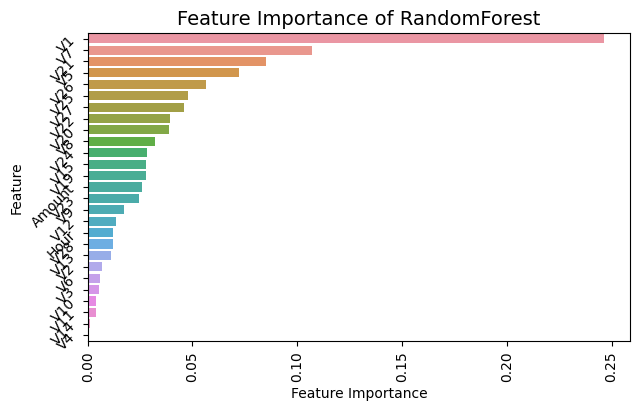

XGBoost Model Feature Importance:


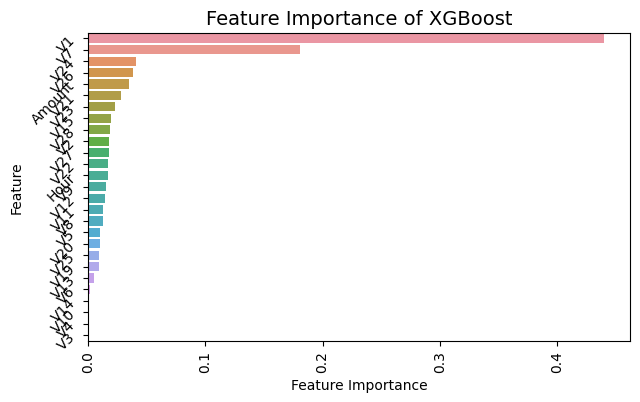

LightGBM Model Feature Importance:
[LightGBM] [Info] Number of positive: 378, number of negative: 378
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2726
[LightGBM] [Info] Number of data points in the train set: 756, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

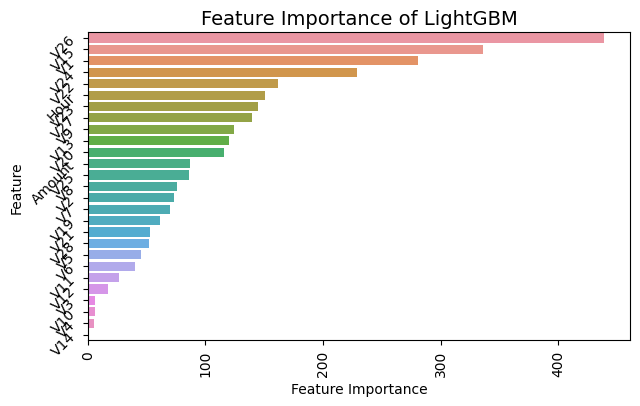

GradientBoosting Model Feature Importance:


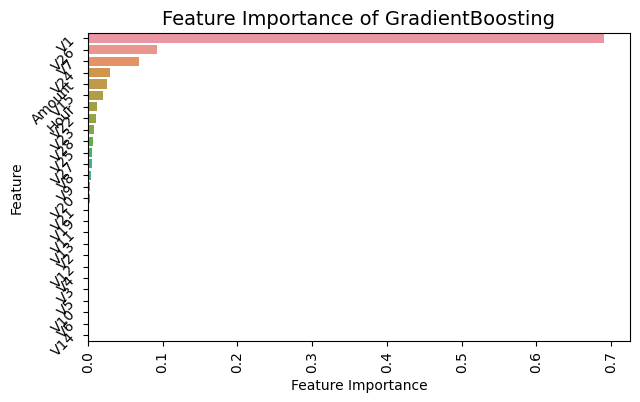

DecisionTree Model Feature Importance:


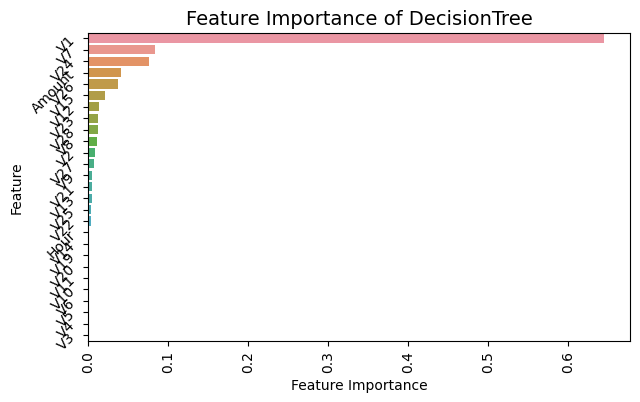

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVC': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression()
}

target = 'Class'
predictors = X_train.columns.tolist()

def plot_feature_importance(model, model_name):
    model.fit(X_train_trf, y_train)
    feature_importance = model.feature_importances_
    feature_names = predictors
    
    # Check if feature_importance has the same length as feature_names
    if len(feature_importance) != len(feature_names):
        raise ValueError("Length mismatch between feature_importance and feature_names")
    
    # Check for NaN or missing values in feature_importance
    if any(pd.isna(feature_importance)):
        raise ValueError("NaN or missing values found in feature_importance")
    
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(7, 4))
    plt.title(f'Feature Importance of {model_name}', fontsize=14)
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    plt.show()

for model_name, model in models.items():
    if model_name in ['SVC', 'LogisticRegression']:
        continue
    print(f'{model_name} Model Feature Importance:')
    try:
        plot_feature_importance(model, model_name)
    except ValueError as e:
        print(f"Error for {model_name}: {str(e)}")


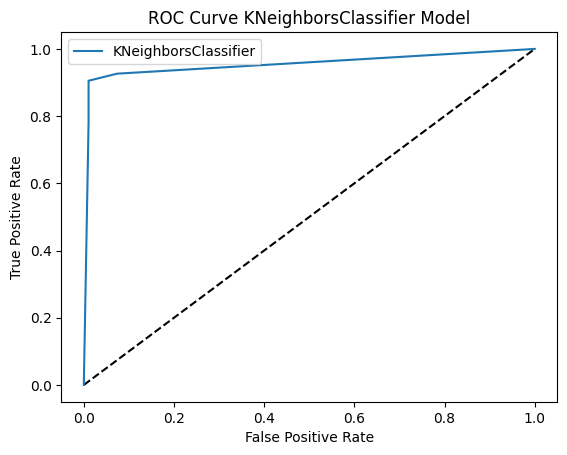

KNeighborsClassifier Model AUC Score is:  0.9541274238227146


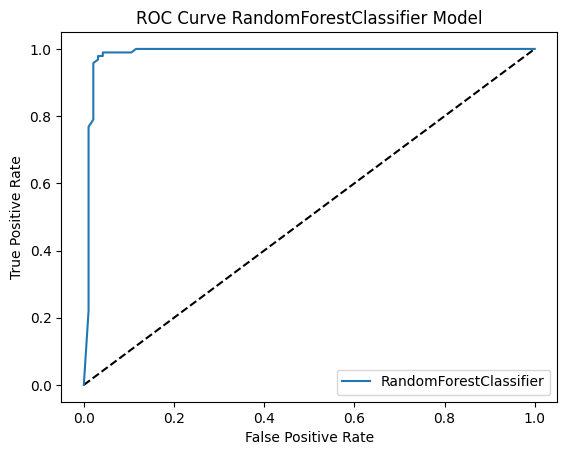

RandomForestClassifier Model AUC Score is:  0.9869806094182825


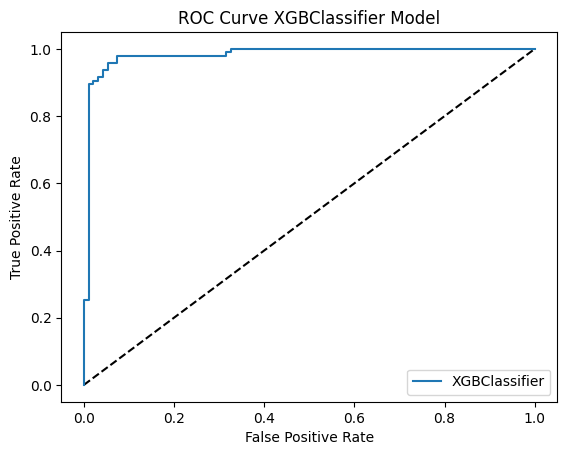

XGBClassifier Model AUC Score is:  0.982382271468144


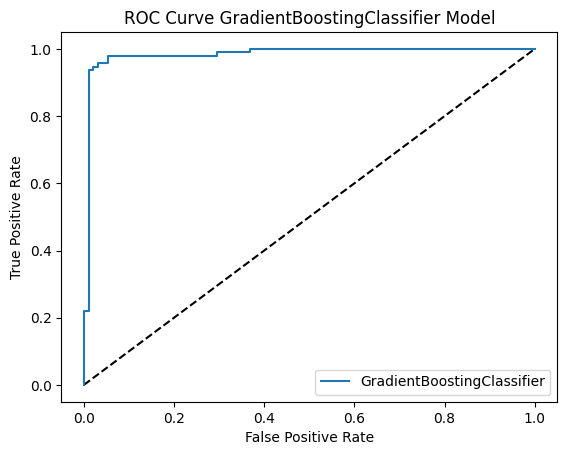

GradientBoostingClassifier Model AUC Score is:  0.9838227146814404


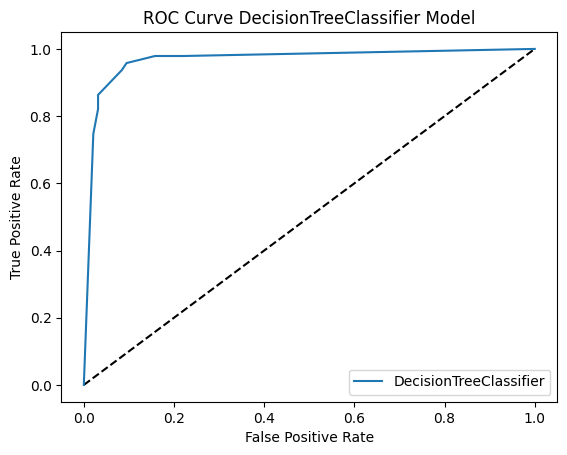

DecisionTreeClassifier Model AUC Score is:  0.9672022160664819


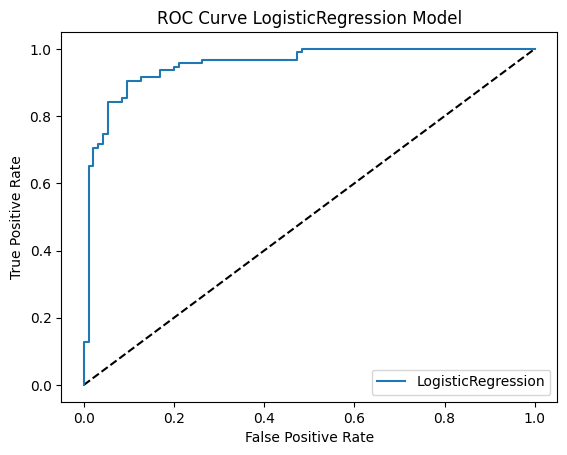

LogisticRegression Model AUC Score is:  0.9537950138504155


In [85]:
from sklearn.metrics import roc_curve, auc

models = [knc, rfc, xgb, gbdt, dtc, lrc]

for model in models:
    model.fit(X_train_trf, y_train)

    y_pred_prob = model.predict_proba(X_test_trf)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr, label=type(model).__name__)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve " + type(model).__name__ + " Model")
    plt.legend()
    plt.show()
    print(type(model).__name__, "Model AUC Score is: ", auc(fpr, tpr))
